In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [18]:
def data_generator(file_path, chunk_size, target_column):
    chunks = pd.read_csv(file_path, chunksize=chunk_size)
    for chunk in chunks:
        X = chunk.drop(columns=[target_column])
        y = chunk[target_column]
        yield X, y

In [19]:
# Define the machine learning pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # Scale numeric features without centering
    ('classifier', MultinomialNB())
])

In [20]:
# Fit the model incrementally with data chunks
first_chunk = True
for X_chunk, y_chunk in data_generator('../data/ML/bystations_class_train.csv', chunk_size=100000, target_column='arrival_delay_check'):
    if first_chunk:
        print("starting first chunk")
        X_chunk_scaled = pipeline.named_steps['scaler'].fit_transform(X_chunk)
        pipeline.named_steps['classifier'].partial_fit(X_chunk_scaled, y_chunk, classes=np.unique(y_chunk))
        first_chunk = False
    else:
        print("starting starting next chunk")
        X_chunk_scaled = pipeline.named_steps['scaler'].transform(X_chunk)
        # For subsequent chunks, update the model incrementally
        pipeline.named_steps['classifier'].partial_fit(X_chunk_scaled, y_chunk)

starting first chunk
starting starting next chunk
starting starting next chunk
starting starting next chunk
starting starting next chunk
starting starting next chunk
starting starting next chunk
starting starting next chunk
starting starting next chunk
starting starting next chunk


In [21]:
Test = pd.read_csv('../data/ML/bystations_class_test.csv')


In [26]:
X_test = Test.drop(columns="arrival_delay_check")
X_test = pipeline.named_steps['scaler'].transform(X_test)
y_test = Test["arrival_delay_check"]

In [27]:
y_pred = pipeline.named_steps['classifier'].predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.66      0.78    227189
           1       0.16      0.69      0.26     21132

    accuracy                           0.67    248321
   macro avg       0.56      0.68      0.52    248321
weighted avg       0.89      0.67      0.74    248321

Confusion Matrix:
[[150704  76485]
 [  6506  14626]]


In [28]:
import seaborn as sns
import numpy as np

Text(50.722222222222214, 0.5, 'True')

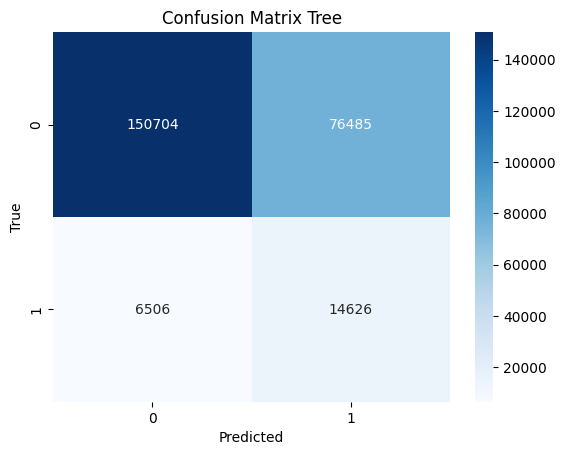

In [29]:
cmat = confusion_matrix(y_test, y_pred)
fig = sns.heatmap(cmat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_pred), yticklabels=np.unique(y_pred))
fig.set_title('Confusion Matrix Tree')
fig.set_xlabel('Predicted')
fig.set_ylabel('True')